In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
import seaborn as sns
from scipy import stats
import datetime as datetime

capital_bike_hourly_weather = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv', index_col=False)




In [3]:
capital_bike_hourly_weather.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [4]:
capital_bike_hourly_weather.tail()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7
26279,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7


In [5]:
capital_bike_hourly_weather.reset_index(drop=True)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [6]:
capital_bike_hourly_weather.dtypes

Casual                     float64
Date                        object
Hour                         int64
Member                     float64
Total_rides                float64
relativehumidity_2m (%)      int64
temperature_2m (°C)        float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object

In [7]:
capital_bike_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
capital_bike_hourly_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.930070,167.330426,0.0,28.00,105.0,237.00,1206.0
Hour,26280.0,11.500000,6.922318,0.0,5.75,11.5,17.25,23.0
Member,26269.0,247.165632,225.283539,0.0,55.00,203.0,371.00,1534.0
Total_rides,26269.0,407.095702,373.005409,1.0,85.00,319.0,616.00,2262.0
relativehumidity_2m (%),26280.0,62.967884,22.724320,5.0,46.00,64.0,82.00,100.0
temperature_2m (°C),26280.0,14.412782,10.285751,-14.6,6.10,14.8,22.70,41.5
weathercode (wmo code),26280.0,7.228311,17.630961,0.0,0.00,1.0,2.00,75.0
windspeed_10m (km/h),26280.0,10.171298,5.261033,0.0,6.50,9.2,12.90,40.1


In [9]:
capital_bike_hourly_weather.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [10]:
capital_bike_hourly_weather['Casual'].fillna(capital_bike_hourly_weather['Casual'].mean(), inplace=True)

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/4023868542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  capital_bike_hourly_weather['Casual'].fillna(capital_bike_hourly_weather['Casual'].mean(), inplace=True)


In [11]:
capital_bike_hourly_weather['Member'].fillna(capital_bike_hourly_weather['Member'].mean(), inplace=True)

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/282195748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  capital_bike_hourly_weather['Member'].fillna(capital_bike_hourly_weather['Member'].mean(), inplace=True)


In [12]:
capital_bike_hourly_weather['Total_rides'].fillna(capital_bike_hourly_weather['Total_rides'].mean(), inplace=True)

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/4226565956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  capital_bike_hourly_weather['Total_rides'].fillna(capital_bike_hourly_weather['Total_rides'].mean(), inplace=True)


In [13]:
capital_bike_hourly_weather.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [14]:
#Checking for duplicates
capital_bike_hourly_weather.duplicated().sum()

np.int64(0)

In [15]:
#Check for objects or strings in the data if there are any
object_col = capital_bike_hourly_weather.select_dtypes(include="object").columns
capital_bike_hourly_weather[object_col].head()

,Date
0,2021-01-01
1,2021-01-01
2,2021-01-01
3,2021-01-01
4,2021-01-01


In [16]:
#Check for objects or strings in the data if there are any
string_col = capital_bike_hourly_weather.select_dtypes(include="string").columns
capital_bike_hourly_weather[string_col].head()

""
0
1
2
3
4


In [17]:
# Check the shape of the data set
print(capital_bike_hourly_weather.shape)

(26280, 9)


In [18]:
capital_bike_hourly_weather.isna()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
26275,False,False,False,False,False,False,False,False,False
26276,False,False,False,False,False,False,False,False,False
26277,False,False,False,False,False,False,False,False,False
26278,False,False,False,False,False,False,False,False,False


In [19]:
capital_bike_hourly_weather.head(10)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2


In [20]:
capital_bike_hourly_weather.tail(10)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
26270,286.0,2023-12-31,14,400.0,686.0,60,-5.3,0,1.5
26271,249.0,2023-12-31,15,400.0,649.0,64,-6.4,0,4.1
26272,250.0,2023-12-31,16,390.0,640.0,69,-7.3,0,4.3
26273,206.0,2023-12-31,17,296.0,502.0,68,-7.0,0,3.3
26274,150.0,2023-12-31,18,220.0,370.0,69,-7.4,0,3.1
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7
26279,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7


In [21]:
capital_bike_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26280 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26280 non-null  float64
 4   Total_rides              26280 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [22]:
print(capital_bike_hourly_weather['Date'].head())
print(capital_bike_hourly_weather['Date'].tail())



0    2021-01-01
1    2021-01-01
2    2021-01-01
3    2021-01-01
4    2021-01-01
Name: Date, dtype: object
26275    2023-12-31
26276    2023-12-31
26277    2023-12-31
26278    2023-12-31
26279    2023-12-31
Name: Date, dtype: object


In [23]:
# Ensure the Date column is in datetime format (if it isn’t already)
capital_bike_hourly_weather['Date'] = pd.to_datetime(capital_bike_hourly_weather['Date'])

# Extract the year from the Date column and create a new column 'Year'
capital_bike_hourly_weather['Year'] = capital_bike_hourly_weather['Date'].dt.year

# Check the result
print(capital_bike_hourly_weather[['Date', 'Year']].head())

        Date  Year
0 2021-01-01  2021
1 2021-01-01  2021
2 2021-01-01  2021
3 2021-01-01  2021
4 2021-01-01  2021


In [24]:
# Ensure Date column is in datetime format
capital_bike_hourly_weather['Date'] = pd.to_datetime(capital_bike_hourly_weather['Date'])

# Function to convert month to season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply function to Date column to create a new 'Season' column
capital_bike_hourly_weather['Season'] = capital_bike_hourly_weather['Date'].apply(get_season)


In [25]:
print(capital_bike_hourly_weather['Season'].head())
print(capital_bike_hourly_weather['Season'].tail())

0    Winter
1    Winter
2    Winter
3    Winter
4    Winter
Name: Season, dtype: object
26275    Winter
26276    Winter
26277    Winter
26278    Winter
26279    Winter
Name: Season, dtype: object


In [26]:
#capital_bike_hourly_weather['Date'] = pd.to_datetime(capital_bike_hourly_weather['Date'])
#capital_bike_hourly_weather['Date'] = capital_bike_hourly_weather['Date'].apply(lambda x: int(x.timestamp()))
#print(capital_bike_hourly_weather)

In [27]:
capital_bike_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26280 non-null  float64       
 4   Total_rides              26280 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
 9   Year                     26280 non-null  int32         
 10  Season                   26280 non-null  object        
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object(1)
memory usage: 2.1+ MB


In [28]:
weather_count = capital_bike_hourly_weather['weathercode (wmo code)'].nunique()
print("Number of unique values in 'weathercode (wmo code)':", weather_count)

Number of unique values in 'weathercode (wmo code)': 13


In [29]:
weather_value_counts = capital_bike_hourly_weather['weathercode (wmo code)'].value_counts()
print("Frequency of each value in 'weathercode (wmo code)':\n", weather_value_counts)

Frequency of each value in 'weathercode (wmo code)':
 weathercode (wmo code)
0     11431
1      6003
3      3290
2      2507
51     1394
53      602
61      400
63      222
55      194
71      102
73       90
75       28
65       17
Name: count, dtype: int64


In [30]:
# Define a dictionary mapping weather codes to descriptive names
weather_code_map = {
0: 'Clear sky',
1: 'Mainly clear',
2: 'Partly cloudy',
3:  'cloudy',
51: 'Light drizzle',
53: 'Moderate drizzle',
55: 'Dense drizzle',
61: 'Slight rain',
63: 'Moderate rain',
65: 'Heavy rain',
71: 'Slight snowfall',
73: 'Moderate snowfall',
75: 'Heavy snowfall'

}

# Map the weather code to names in a new column
capital_bike_hourly_weather['weather_description'] = capital_bike_hourly_weather['weathercode (wmo code)'].map(weather_code_map)

# Check the result
print(capital_bike_hourly_weather[['weathercode (wmo code)', 'weather_description']].head(10))
capital_bike_hourly_weather.info()

   weathercode (wmo code) weather_description
0                       1        Mainly clear
1                       1        Mainly clear
2                       2       Partly cloudy
3                       2       Partly cloudy
4                       2       Partly cloudy
5                       2       Partly cloudy
6                       2       Partly cloudy
7                       3              cloudy
8                       3              cloudy
9                       3              cloudy
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26280 non-null  float64       
 4   Total_rides   

In [31]:
capital_bike_hourly_weather.tail()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,2023,Winter,Clear sky
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,2023,Winter,Clear sky
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,2023,Winter,Clear sky
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,2023,Winter,Clear sky
26279,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7,2023,Winter,Clear sky


In [32]:
temperature_count = capital_bike_hourly_weather['temperature_2m (°C)'].nunique()
print("Number of unique values in 'temperature_2m (°C)':", temperature_count)

Number of unique values in 'temperature_2m (°C)': 532


In [33]:
temperature_counts = capital_bike_hourly_weather['temperature_2m (°C)'].value_counts()
print("Frequency of each value in 'weathercode (wmo code)':\n", temperature_counts)

Frequency of each value in 'weathercode (wmo code)':
 temperature_2m (°C)
 22.4    111
 21.0    110
 25.3    109
 23.4    109
 23.9    107
        ... 
 40.4      1
 38.4      1
 37.5      1
 38.3      1
-11.1      1
Name: count, Length: 532, dtype: int64


In [34]:
# Function to classify temperature into 'Cold', 'Normal', or 'Hot'
def temperature_category(temp):
    if temp < 10:
        return 'Cold'
    elif 10 <= temp <= 25:
        return 'Normal'
    else:
        return 'Hot'

# Assuming 'temperature_2m (°C)' is the column containing temperature values
capital_bike_hourly_weather['Temperature_Category'] = capital_bike_hourly_weather['temperature_2m (°C)'].apply(temperature_category)

# Check the result
print(capital_bike_hourly_weather[['temperature_2m (°C)', 'Temperature_Category']].head())

   temperature_2m (°C) Temperature_Category
0                  2.4                 Cold
1                  1.8                 Cold
2                  1.1                 Cold
3                  1.6                 Cold
4                  1.6                 Cold


In [35]:
capital_bike_hourly_weather.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description,Temperature_Category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,Winter,Mainly clear,Cold
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,Winter,Mainly clear,Cold
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,Winter,Partly cloudy,Cold
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,Winter,Partly cloudy,Cold
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,Winter,Partly cloudy,Cold


In [36]:
hour_count = capital_bike_hourly_weather['Hour'].nunique()
print("Number of unique values in Hour':", hour_count)

Number of unique values in Hour': 24


In [37]:
hour_counts = capital_bike_hourly_weather['Hour'].value_counts()
print("Frequency of each value in 'Hour':\n", hour_counts)

Frequency of each value in 'Hour':
 Hour
0     1095
1     1095
22    1095
21    1095
20    1095
19    1095
18    1095
17    1095
16    1095
15    1095
14    1095
13    1095
12    1095
11    1095
10    1095
9     1095
8     1095
7     1095
6     1095
5     1095
4     1095
3     1095
2     1095
23    1095
Name: count, dtype: int64


In [38]:
# Ensure the Date column is in datetime format (if it isn’t already)
capital_bike_hourly_weather['Date'] = pd.to_datetime(capital_bike_hourly_weather['Date'])

# Extract the year from the Date column and create a new column 'Year'
capital_bike_hourly_weather['Year'] = capital_bike_hourly_weather['Date'].dt.year

# Check the result
print(capital_bike_hourly_weather[['Date', 'Year']].head())

        Date  Year
0 2021-01-01  2021
1 2021-01-01  2021
2 2021-01-01  2021
3 2021-01-01  2021
4 2021-01-01  2021


In [39]:
# Function to classify hour into 'Morning', 'Afternoon', 'Evening', or 'Night'
def time_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 21:
        return 'Evening'
    else:
        return 'Night'

# Assuming 'Hour' is the column containing the hour values
capital_bike_hourly_weather['Time_of_Day'] = capital_bike_hourly_weather['Hour'].apply(time_of_day)

# Check the result
print(capital_bike_hourly_weather[['Hour', 'Time_of_Day']].head(24))

    Hour Time_of_Day
0      0       Night
1      1       Night
2      2       Night
3      3       Night
4      4       Night
5      5       Night
6      6     Morning
7      7     Morning
8      8     Morning
9      9     Morning
10    10     Morning
11    11     Morning
12    12   Afternoon
13    13   Afternoon
14    14   Afternoon
15    15   Afternoon
16    16   Afternoon
17    17   Afternoon
18    18     Evening
19    19     Evening
20    20     Evening
21    21     Evening
22    22       Night
23    23       Night


In [40]:
capital_bike_hourly_weather.tail(24)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description,Temperature_Category,Time_of_Day
26256,40.0,2023-12-31,0,91.0,131.0,59,-4.5,0,4.6,2023,Winter,Clear sky,Cold,Night
26257,39.0,2023-12-31,1,41.0,80.0,52,-2.8,0,5.6,2023,Winter,Clear sky,Cold,Night
26258,21.0,2023-12-31,2,31.0,52.0,45,-1.0,0,7.6,2023,Winter,Clear sky,Cold,Night
26259,12.0,2023-12-31,3,18.0,30.0,41,0.4,0,6.2,2023,Winter,Clear sky,Cold,Night
26260,14.0,2023-12-31,4,10.0,24.0,39,1.2,0,4.1,2023,Winter,Clear sky,Cold,Night
26261,6.0,2023-12-31,5,12.0,18.0,39,1.4,0,2.7,2023,Winter,Clear sky,Cold,Night
26262,14.0,2023-12-31,6,42.0,56.0,39,1.2,0,2.2,2023,Winter,Clear sky,Cold,Morning
26263,27.0,2023-12-31,7,71.0,98.0,50,-0.9,0,5.0,2023,Winter,Clear sky,Cold,Morning
26264,50.0,2023-12-31,8,128.0,178.0,54,-1.9,0,8.0,2023,Winter,Clear sky,Cold,Morning
26265,84.0,2023-12-31,9,198.0,282.0,53,-2.7,0,10.2,2023,Winter,Clear sky,Cold,Morning


In [41]:
# Define list of holiday dates
holidays = {
    '2021-01-01': 'New Year\'s Day',
    '2021-01-18': 'Martin Luther King Jr. Day',
    '2021-02-15': 'Presidents\' Day',
    '2021-05-31': 'Memorial Day',
    '2021-07-04': 'Independence Day',
    '2021-09-06': 'Labor Day',
    '2021-10-11': 'Columbus Day',
    '2021-11-11': 'Veterans Day',
    '2021-11-25': 'Thanksgiving Day',
    '2021-12-25': 'Christmas Day',
    '2022-01-01': 'New Year\'s Day',
    '2022-01-17': 'Martin Luther King Jr. Day',
    '2022-02-21': 'Presidents\' Day',
    '2022-05-30': 'Memorial Day',
    '2022-07-04': 'Independence Day',
    '2022-09-05': 'Labor Day',
    '2022-10-10': 'Columbus Day',
    '2022-11-11': 'Veterans Day',
    '2022-11-24': 'Thanksgiving Day',
    '2022-12-25': 'Christmas Day',
    '2023-01-01': 'New Year\'s Day',
    '2023-01-16': 'Martin Luther King Jr. Day',
    '2023-02-20': 'Presidents\' Day',
    '2023-05-29': 'Memorial Day',
    '2023-07-04': 'Independence Day',
    '2023-09-04': 'Labor Day',
    '2023-10-09': 'Columbus Day',
    '2023-11-11': 'Veterans Day',
    '2023-11-23': 'Thanksgiving Day',
    '2023-12-25': 'Christmas Day'
}

# Convert the keys to a set of datetime objects for easy comparison
holiday_dates = set(pd.to_datetime(list(holidays.keys())))

# Create the new 'Holiday' column with 'Yes' for holidays, 'No' otherwise
capital_bike_hourly_weather['Holiday'] = capital_bike_hourly_weather['Date'].apply(lambda date: 'Yes' if date in holiday_dates else 'No')

# Check the result
print(capital_bike_hourly_weather[['Date', 'Holiday']].head(10))

        Date Holiday
0 2021-01-01     Yes
1 2021-01-01     Yes
2 2021-01-01     Yes
3 2021-01-01     Yes
4 2021-01-01     Yes
5 2021-01-01     Yes
6 2021-01-01     Yes
7 2021-01-01     Yes
8 2021-01-01     Yes
9 2021-01-01     Yes


In [42]:
 #Set 'Casual' column values to 0
#capital_bike_hourly_weather['Casual'] = 0

 #Set 'Member' column values to 1
#capital_bike_hourly_weather['Member'] = 1

# Check the result
#print(capital_bike_hourly_weather[['Casual', 'Member']].head())

In [43]:
capital_bike_hourly_weather.tail(24)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description,Temperature_Category,Time_of_Day,Holiday
26256,40.0,2023-12-31,0,91.0,131.0,59,-4.5,0,4.6,2023,Winter,Clear sky,Cold,Night,No
26257,39.0,2023-12-31,1,41.0,80.0,52,-2.8,0,5.6,2023,Winter,Clear sky,Cold,Night,No
26258,21.0,2023-12-31,2,31.0,52.0,45,-1.0,0,7.6,2023,Winter,Clear sky,Cold,Night,No
26259,12.0,2023-12-31,3,18.0,30.0,41,0.4,0,6.2,2023,Winter,Clear sky,Cold,Night,No
26260,14.0,2023-12-31,4,10.0,24.0,39,1.2,0,4.1,2023,Winter,Clear sky,Cold,Night,No
26261,6.0,2023-12-31,5,12.0,18.0,39,1.4,0,2.7,2023,Winter,Clear sky,Cold,Night,No
26262,14.0,2023-12-31,6,42.0,56.0,39,1.2,0,2.2,2023,Winter,Clear sky,Cold,Morning,No
26263,27.0,2023-12-31,7,71.0,98.0,50,-0.9,0,5.0,2023,Winter,Clear sky,Cold,Morning,No
26264,50.0,2023-12-31,8,128.0,178.0,54,-1.9,0,8.0,2023,Winter,Clear sky,Cold,Morning,No
26265,84.0,2023-12-31,9,198.0,282.0,53,-2.7,0,10.2,2023,Winter,Clear sky,Cold,Morning,No


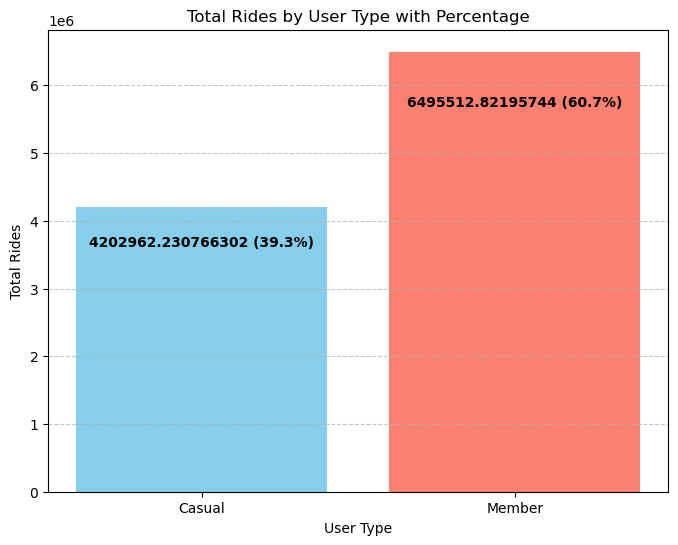

In [44]:
# Calculate the total rides for 'Casual' and 'Member'
total_rides_data = {
    'User_Type': ['Casual', 'Member'],
    'Total_Rides': [
        capital_bike_hourly_weather['Casual'].sum(),
        capital_bike_hourly_weather['Member'].sum()
    ]
}

# Convert to DataFrame for easy plotting
total_rides_df = pd.DataFrame(total_rides_data)

# Calculate percentage
total_rides_df['Percentage'] = (total_rides_df['Total_Rides'] / total_rides_df['Total_Rides'].sum()) * 100

# Plot the results using a bar plot with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(total_rides_df['User_Type'], total_rides_df['Total_Rides'], color=['skyblue', 'salmon'])

# Add text annotations for total rides and percentages
for bar, total, pct in zip(bars, total_rides_df['Total_Rides'], total_rides_df['Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() - (bar.get_height() * 0.1), 
        f'{total} ({pct:.1f}%)', 
        ha='center', 
        va='top', 
        color='black', 
        fontweight='bold'
    )

# Set title and labels
plt.title('Total Rides by User Type with Percentage')
plt.xlabel('User Type')
plt.ylabel('Total Rides')

# Add grid to y-axis for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

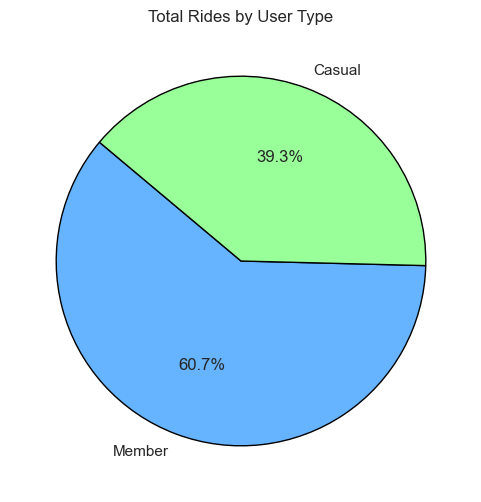

In [68]:
# Calculate the total rides for 'Member' and 'Casual'
total_member = capital_bike_hourly_weather['Member'].sum()
total_casual = capital_bike_hourly_weather['Casual'].sum()

# Data for pie chart
labels = ['Member', 'Casual']
sizes = [total_member, total_casual]
colors = ['#66b3ff', '#99ff99']  # Color scheme

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Total Rides by User Type')
plt.show()

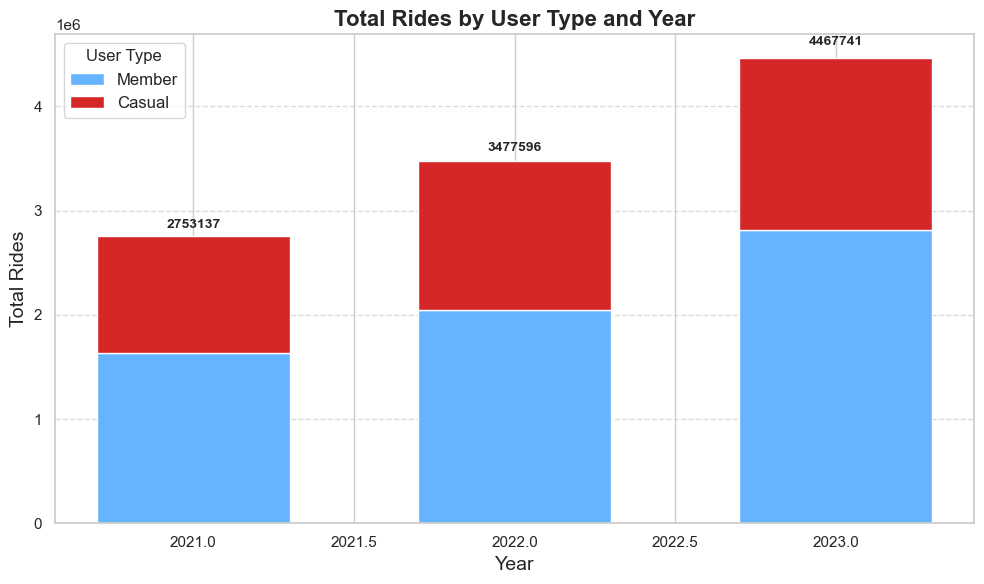

In [ ]:
# Group data by Year and calculate the sum of rides for each User Type
total_rides_by_year_user = capital_bike_hourly_weather.groupby('Year')[['Member', 'Casual']].sum().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.6
years = total_rides_by_year_user['Year']
member_rides = total_rides_by_year_user['Member']
casual_rides = total_rides_by_year_user['Casual']

# Plot 'Member' rides
plt.bar(years, member_rides, label='Member', color='#66b3ff', width=bar_width)

# Plot 'Casual' rides on top of 'Member'
plt.bar(years, casual_rides, label='Casual', color='#d62728', width=bar_width, bottom=member_rides)

# Add annotations to display total rides
for i, (m, c) in enumerate(zip(member_rides, casual_rides)):
    total = m + c
    plt.text(years[i], total + 0.02 * total, f"{int(total)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels, legend, and title
plt.title('Total Rides by User Type and Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.legend(title='User Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


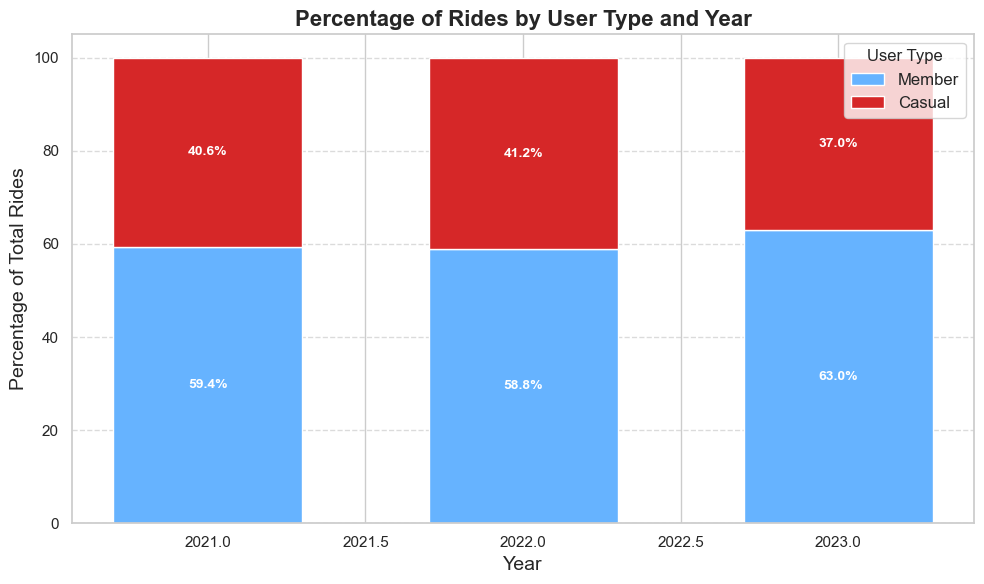

In [86]:
# Group data by Year and calculate the sum of rides for each User Type
total_rides_by_year_user = capital_bike_hourly_weather.groupby('Year')[['Member', 'Casual']].sum()

# Calculate percentages
total_rides_by_year_user['Total'] = total_rides_by_year_user['Member'] + total_rides_by_year_user['Casual']
total_rides_by_year_user['Member_Percentage'] = (total_rides_by_year_user['Member'] / total_rides_by_year_user['Total']) * 100
total_rides_by_year_user['Casual_Percentage'] = (total_rides_by_year_user['Casual'] / total_rides_by_year_user['Total']) * 100

# Reset index for plotting
total_rides_by_year_user = total_rides_by_year_user.reset_index()

# Plotting the percentage stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.6
years = total_rides_by_year_user['Year']
member_percentages = total_rides_by_year_user['Member_Percentage']
casual_percentages = total_rides_by_year_user['Casual_Percentage']

# Plot 'Member' percentages
plt.bar(years, member_percentages, label='Member', color='#66b3ff', width=bar_width)

# Plot 'Casual' percentages on top of 'Member'
plt.bar(years, casual_percentages, label='Casual', color='#d62728', width=bar_width, bottom=member_percentages)

# Add annotations to show percentages
for i, (m, c) in enumerate(zip(member_percentages, casual_percentages)):
    plt.text(years[i], m / 2, f"{m:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    plt.text(years[i], m + (c / 2), f"{c:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Add labels, legend, and title
plt.title('Percentage of Rides by User Type and Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Rides', fontsize=14)
plt.legend(title='User Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/800606174.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


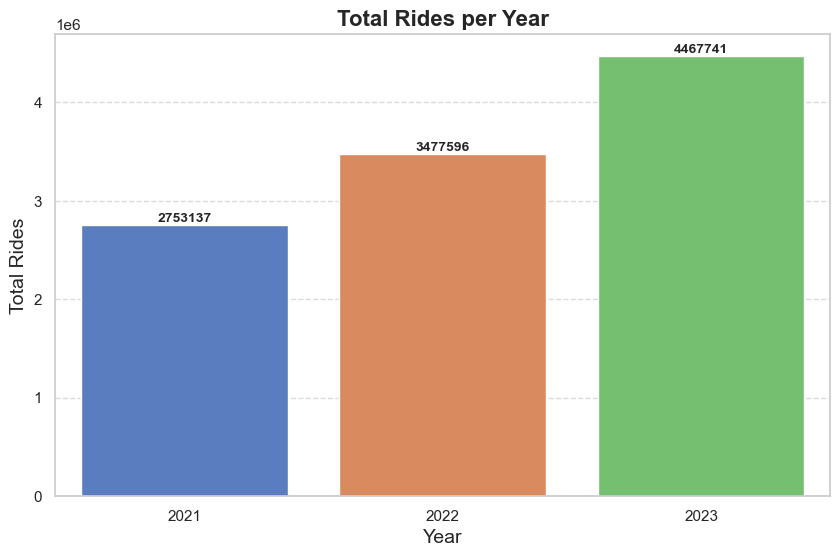

In [ ]:
# Sum Total_rides for each Year
total_rides_per_year = capital_bike_hourly_weather.groupby('Year')['Total_rides'].sum().reset_index()

# Set a style and color palette for better aesthetics
sns.set(style="whitegrid") 
palette = sns.color_palette("muted", n_colors=total_rides_per_year['Year'].nunique())

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=total_rides_per_year, 
    x="Year", 
    y="Total_rides", 
    palette=palette,
    dodge=False
)

# Annotate the bars with the total values
for index, row in total_rides_per_year.iterrows():
    plt.text(
        index, 
        row['Total_rides'], 
        f"{int(row['Total_rides'])}",  # Format as an integer
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

# Add grid, title, and labels
plt.title("Total Rides per Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


<Axes: xlabel='Year', ylabel='Total_rides'>

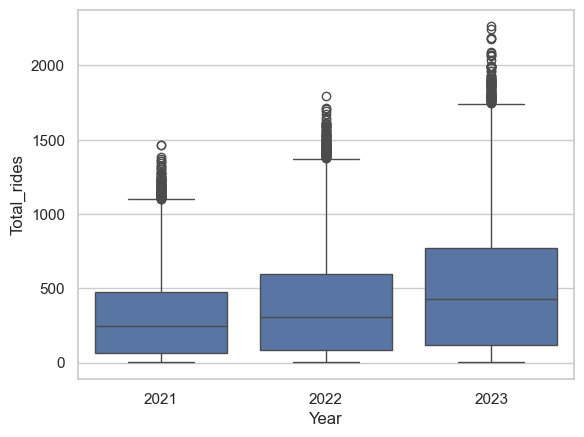

In [47]:
sns.boxplot(x= 'Year', y= 'Total_rides', data = capital_bike_hourly_weather)

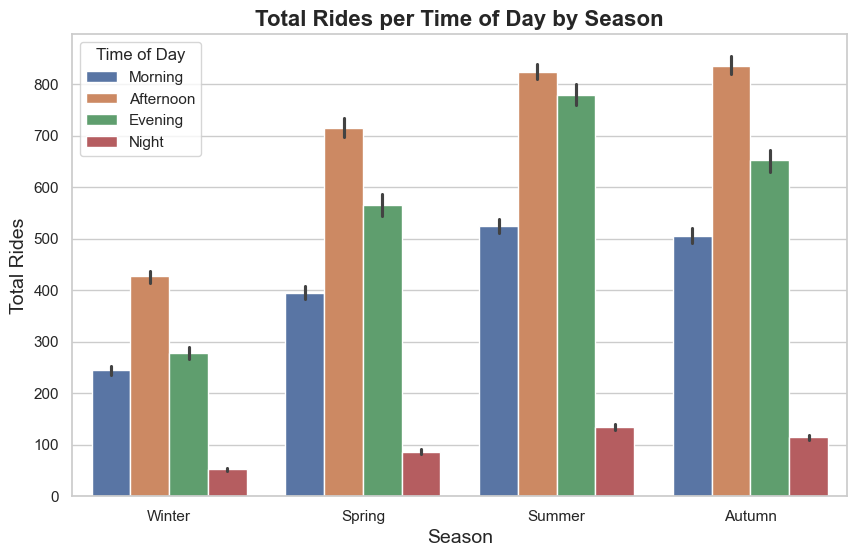

In [ ]:
# Create a custom order for the seasons
season_order = ["Winter", "Spring", "Summer", "Autumn"]

# Ensure that the 'Season' column is treated as a categorical type with the specified order
capital_bike_hourly_weather["Season"] = pd.Categorical(
    capital_bike_hourly_weather["Season"], 
    categories=season_order, 
    ordered=True
)

# Create a custom order for Time_of_Day
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]

# Ensure that the 'Time_of_Day' column is treated as a categorical type with the specified order
capital_bike_hourly_weather["Time_of_Day"] = pd.Categorical(
    capital_bike_hourly_weather["Time_of_Day"], 
    categories=time_of_day_order, 
    ordered=True
)

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=capital_bike_hourly_weather, 
    x="Season", 
    y="Total_rides", 
    hue="Time_of_Day", 
    hue_order=time_of_day_order  # Apply the custom order in the legend and plot
)
plt.title("Total Rides per Time of Day by Season", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)
plt.legend(title="Time of Day")
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/3581541644.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rides_season_time = capital_bike_hourly_weather.groupby(['Season', 'Time_of_Day'])['Total_rides'].sum().reset_index()


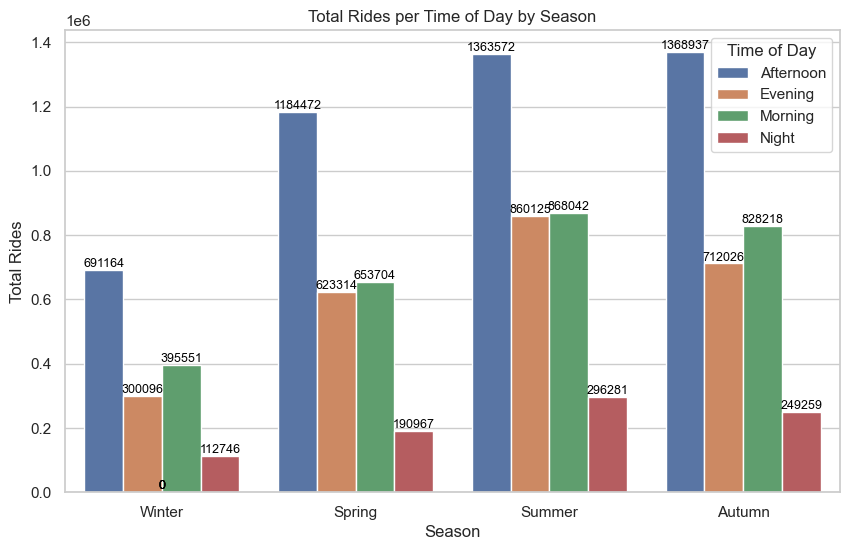

In [ ]:
# Create a custom order for the seasons
season_order = ["Winter", "Spring", "Summer", "Autumn"]

# Ensure that the 'Season' column in your DataFrame is treated as a categorical type with the specified order
capital_bike_hourly_weather["Season"] = pd.Categorical(
    capital_bike_hourly_weather["Season"], 
    categories=season_order, 
    ordered=True
)

# Aggregate the total rides by Season and Time_of_Day
total_rides_season_time = capital_bike_hourly_weather.groupby(['Season', 'Time_of_Day'])['Total_rides'].sum().reset_index()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=total_rides_season_time, x="Season", y="Total_rides", hue="Time_of_Day", order=season_order)
plt.title("Total Rides per Time of Day by Season")
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.legend(title="Time of Day")

# Annotate bars with the total values
for bar in plt.gca().patches:
    bar_value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        bar_value,  # Place the text slightly above the bar
        f"{int(bar_value)}",  # Format as an integer
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black'
    )

plt.show()


In [49]:
capital_bike_hourly_weather.tail(24)


,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description,Temperature_Category,Time_of_Day,Holiday
26256,40.0,2023-12-31,0,91.0,131.0,59,-4.5,0,4.6,2023,Winter,Clear sky,Cold,Night,No
26257,39.0,2023-12-31,1,41.0,80.0,52,-2.8,0,5.6,2023,Winter,Clear sky,Cold,Night,No
26258,21.0,2023-12-31,2,31.0,52.0,45,-1.0,0,7.6,2023,Winter,Clear sky,Cold,Night,No
26259,12.0,2023-12-31,3,18.0,30.0,41,0.4,0,6.2,2023,Winter,Clear sky,Cold,Night,No
26260,14.0,2023-12-31,4,10.0,24.0,39,1.2,0,4.1,2023,Winter,Clear sky,Cold,Night,No
26261,6.0,2023-12-31,5,12.0,18.0,39,1.4,0,2.7,2023,Winter,Clear sky,Cold,Night,No
26262,14.0,2023-12-31,6,42.0,56.0,39,1.2,0,2.2,2023,Winter,Clear sky,Cold,Morning,No
26263,27.0,2023-12-31,7,71.0,98.0,50,-0.9,0,5.0,2023,Winter,Clear sky,Cold,Morning,No
26264,50.0,2023-12-31,8,128.0,178.0,54,-1.9,0,8.0,2023,Winter,Clear sky,Cold,Morning,No
26265,84.0,2023-12-31,9,198.0,282.0,53,-2.7,0,10.2,2023,Winter,Clear sky,Cold,Morning,No


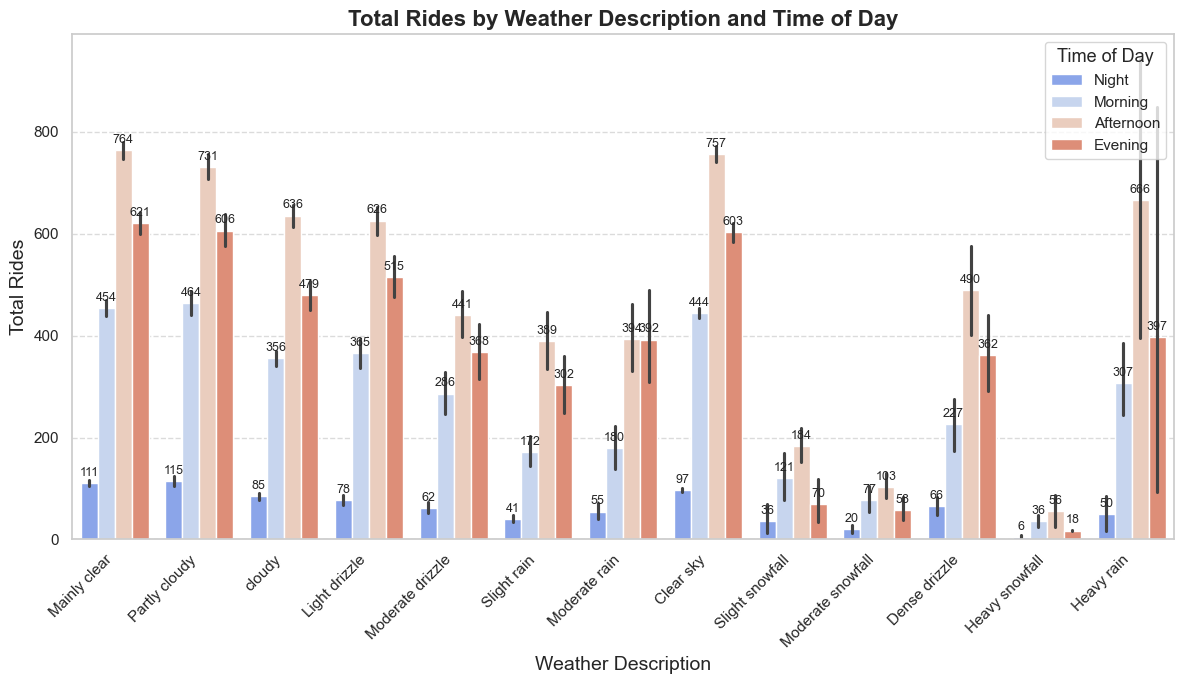

In [50]:
# Set the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", n_colors=capital_bike_hourly_weather['Time_of_Day'].nunique())

# Create the bar plot with improved aesthetics
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(
    data=capital_bike_hourly_weather,
    x="weather_description",
    y="Total_rides",
    hue="Time_of_Day",
    palette=palette,
    dodge=True
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set title and labels with better formatting
plt.title("Total Rides by Weather Description and Time of Day", fontsize=16, fontweight='bold')
plt.xlabel("Weather Description", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend position and formatting
plt.legend(title="Time of Day", title_fontsize='13', loc='upper right', fontsize='11', frameon=True, framealpha=0.8)

# Add data labels above bars for clarity
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

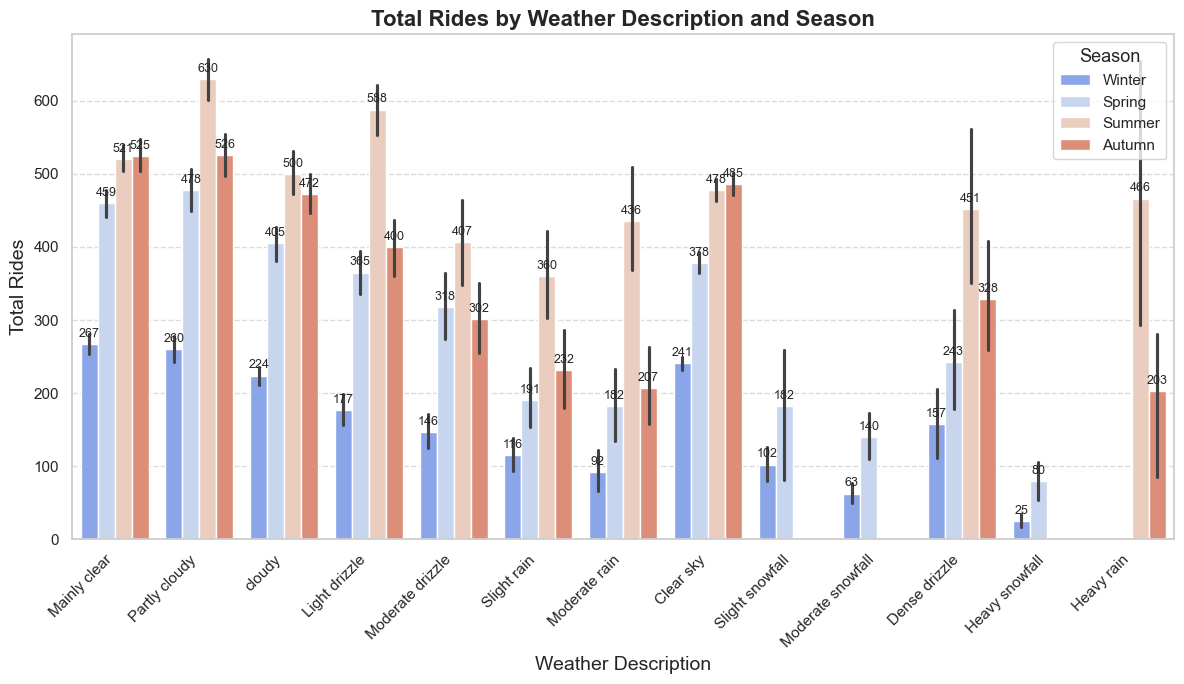

In [51]:
# Set the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", n_colors=capital_bike_hourly_weather['Season'].nunique())

# Create the bar plot with improved aesthetics
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(
    data=capital_bike_hourly_weather,
    x="weather_description",
    y="Total_rides",
    hue="Season",
    palette=palette,
    dodge=True
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set title and labels with better formatting
plt.title("Total Rides by Weather Description and Season", fontsize=16, fontweight='bold')
plt.xlabel("Weather Description", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend position and formatting
plt.legend(title="Season", title_fontsize='13', loc='upper right', fontsize='11', frameon=True, framealpha=0.8)

# Add data labels above bars for clarity
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

<Figure size 1000x600 with 0 Axes>

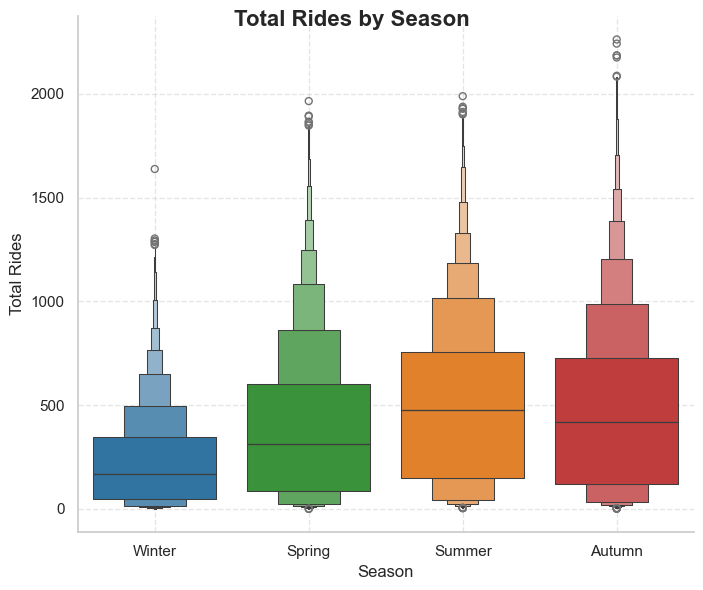

In [52]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Total_rides' in the 'capital_bike_hourly_weather' dataset
capital_bike_hourly_weather_filtered = remove_outliers(capital_bike_hourly_weather, 'Total_rides')
# Define a custom color palette for each season
season_colors = {
    'Winter': '#1f77b4',   # blue
    'Spring': '#2ca02c',   # green
    'Summer': '#ff7f0e',   # orange
    'Autumn': '#d62728'    # red
}

# Set a more readable style
sns.set_style("whitegrid")

# Create the catplot with improved aesthetics
plt.figure(figsize=(10, 6))
plot = sns.catplot(
    data=capital_bike_hourly_weather,
    x="Season",
    y="Total_rides",
    hue="Season",
    kind="boxen",
    palette=season_colors,
    height=6,
    aspect=1.2
)

# Improve title and axis labels
plot.set_axis_labels("Season", "Total Rides", fontsize=12)
plot.fig.suptitle("Total Rides by Season", fontsize=16, weight='bold')
plot.set_xticklabels(["Winter", "Spring", "Summer", "Autumn"], fontsize=11)

# Remove the redundant legend
#plot._legend.remove()

# Add grid and show plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

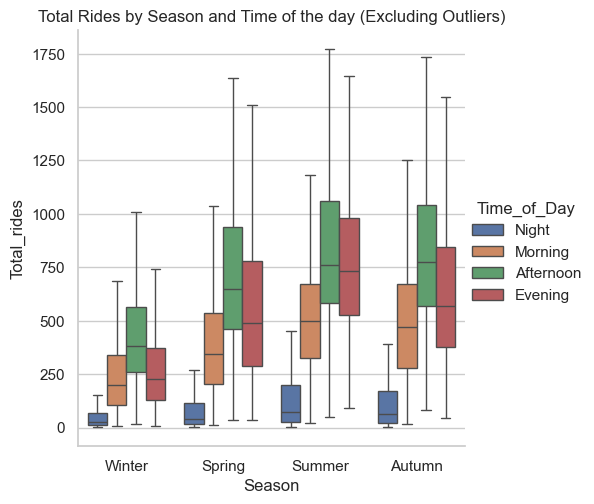

In [53]:
#sns.catplot(data=capital_bike_hourly_weather, x="Season", y="Total_rides", hue="Time_of_Day", kind="boxen")
# Plot using 'box' and exclude outliers using showfliers=False
sns.catplot(
    data=capital_bike_hourly_weather,
    x="Season",
    y="Total_rides",
    hue="Time_of_Day",
    kind="box",
    showfliers=False
)
plt.title("Total Rides by Season and Time of the day (Excluding Outliers)")
plt.show()

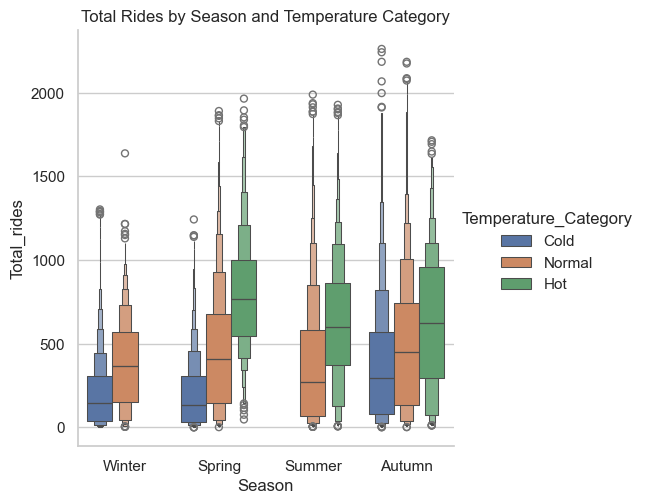

In [54]:
sns.catplot(data=capital_bike_hourly_weather, x="Season", y="Total_rides", hue="Temperature_Category", kind="boxen")
plt.title("Total Rides by Season and Temperature Category")
plt.show()

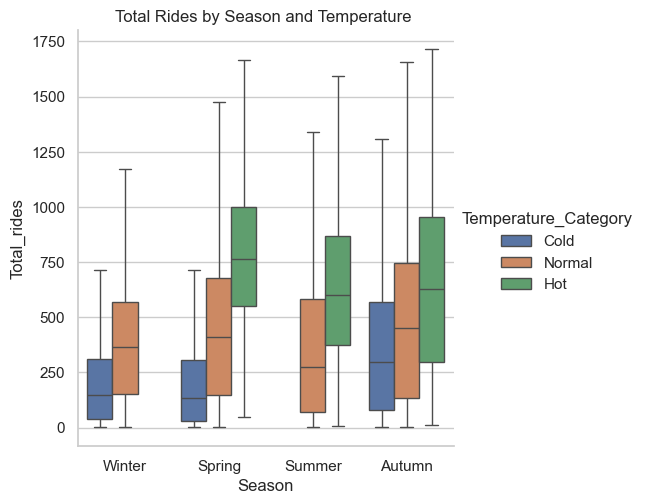

In [73]:
# Plot using 'box' and exclude outliers using showfliers=False
sns.catplot(
    data=capital_bike_hourly_weather,
    x="Season",
    y="Total_rides",
    hue="Temperature_Category",
    kind="box",
    showfliers=False
)
plt.title("Total Rides by Season and Temperature ")
plt.show()

In [56]:
capital_bike_hourly_weather.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Year,Season,weather_description,Temperature_Category,Time_of_Day,Holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,Winter,Mainly clear,Cold,Night,Yes
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,Winter,Mainly clear,Cold,Night,Yes
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,Winter,Partly cloudy,Cold,Night,Yes
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,Winter,Partly cloudy,Cold,Night,Yes
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,Winter,Partly cloudy,Cold,Night,Yes


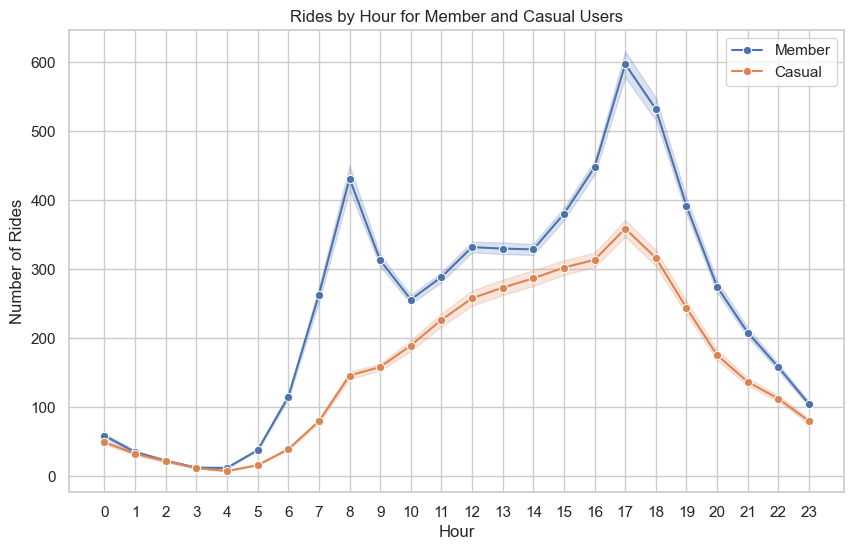

In [57]:
# Plot the Member and Casual rides by Hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=capital_bike_hourly_weather, x="Hour", y="Member", label="Member", marker="o")
sns.lineplot(data=capital_bike_hourly_weather, x="Hour", y="Casual", label="Casual", marker="o")

# Set the x-axis to show all hours from 0 to 23
plt.xticks(ticks=range(24), labels=range(24))

# Add labels and title
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.title("Rides by Hour for Member and Casual Users")
plt.legend()

# Show the plot
plt.show()

In [58]:
#

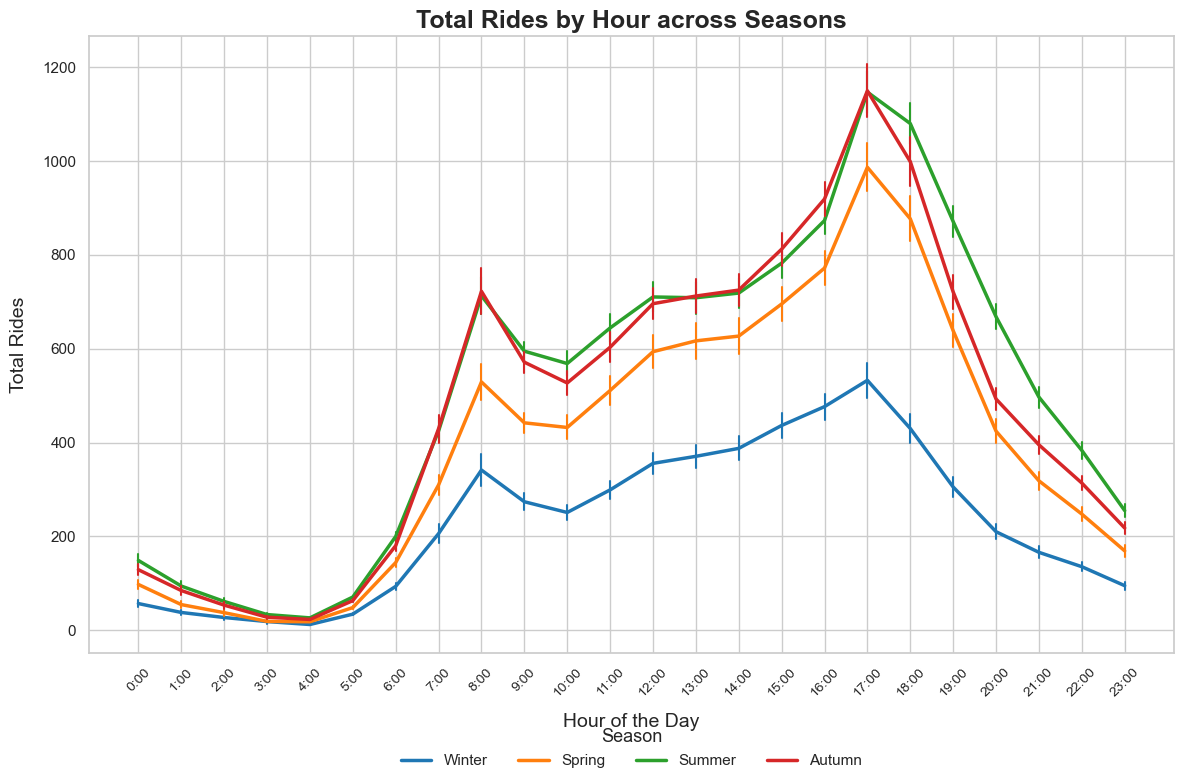

In [59]:
# Set a custom style and color palette
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])  # Colors for Winter, Spring, Summer, Autumn

# Plot with improved settings
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=capital_bike_hourly_weather, 
    x="Hour", 
    y="Total_rides", 
    hue="Season", 
    err_style="bars", 
    errorbar=("se", 2),  # Standard error with 2x multiplier for error bars
    palette=custom_palette, 
    linewidth=2.5
)
# Show all hours on the X-axis
plt.xticks(ticks=range(0, 24), labels=[f"{h}:00" for h in range(24)], fontsize=10, rotation=45)

# Customizing labels and title
plt.title("Total Rides by Hour across Seasons", fontsize=18, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=14, labelpad=10)
plt.ylabel("Total Rides", fontsize=14, labelpad=10)

# Adjusting the legend outside of the plot
plt.legend(title="Season", title_fontsize=13, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

# Show the plot

plt.tight_layout()  # Adjusts plot to fit all elements well
plt.show()

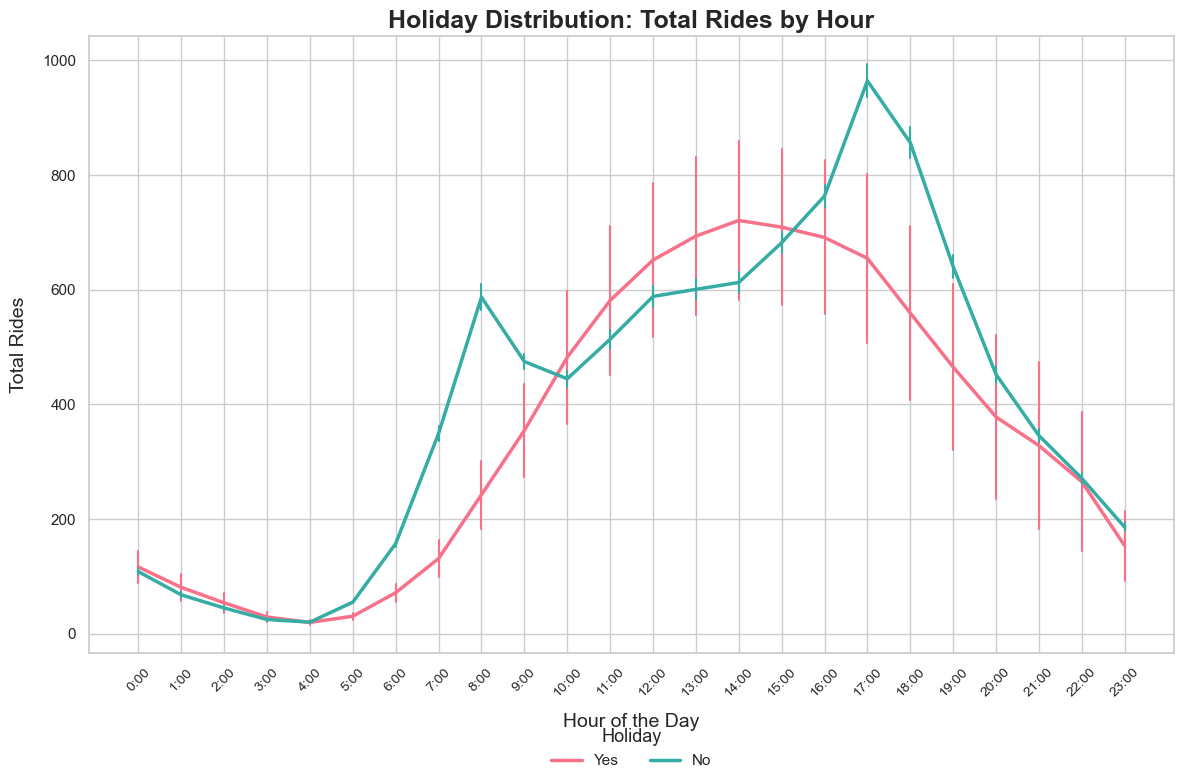

In [60]:
# Set a custom style and color palette
sns.set_theme(style="whitegrid")
holiday_palette = sns.color_palette("husl", 2)  

# Plot the holiday distribution
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=capital_bike_hourly_weather, 
    x="Hour",  
    y="Total_rides", 
    hue="Holiday", 
    err_style="bars", 
    errorbar=("se", 2),  # Standard error with 2x multiplier for error bars
    palette=holiday_palette, 
    linewidth=2.5
)

# Show all hours on the X-axis
plt.xticks(ticks=range(0, 24), labels=[f"{h}:00" for h in range(24)], fontsize=10, rotation=45)

# Customizing labels and title
plt.title("Holiday Distribution: Total Rides by Hour", fontsize=18, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=14, labelpad=10)
plt.ylabel("Total Rides", fontsize=14, labelpad=10)

# Adjusting the legend outside of the plot
plt.legend(title="Holiday", title_fontsize=13, fontsize=11, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)

# Show the plot
plt.tight_layout()  # Adjusts plot to fit all elements well
plt.show()


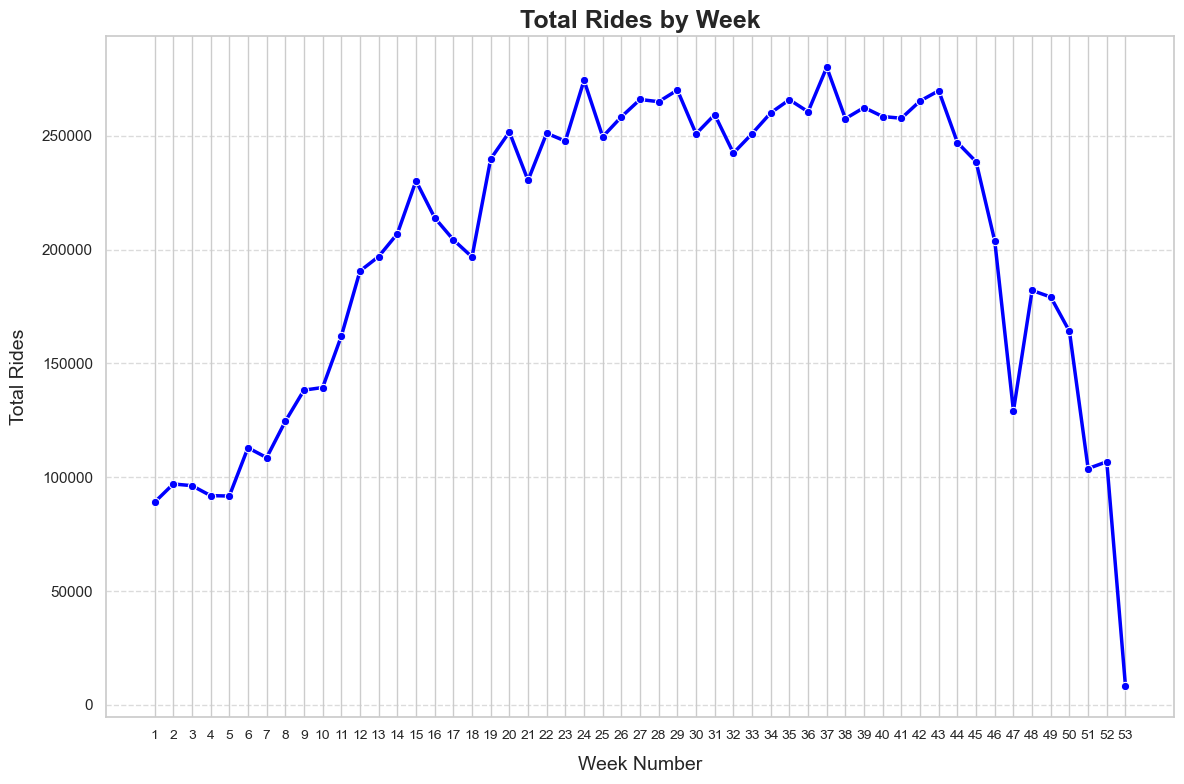

In [ ]:
# Ensure 'Date' column is in datetime format
capital_bike_hourly_weather['Date'] = pd.to_datetime(capital_bike_hourly_weather['Date'])

# Extract the week number from the 'Date' column
capital_bike_hourly_weather['Week'] = capital_bike_hourly_weather['Date'].dt.isocalendar().week

# Group by 'Week' and calculate total rides
weekly_rides = capital_bike_hourly_weather.groupby('Week')['Total_rides'].sum().reset_index()

# Plot the weekly ride distribution
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=weekly_rides,
    x='Week',
    y='Total_rides',
    marker='o',
    color='blue',
    linewidth=2.5
)

# Customizing labels and title
plt.title("Total Rides by Week", fontsize=18, fontweight="bold")
plt.xlabel("Week Number", fontsize=14, labelpad=10)
plt.ylabel("Total Rides", fontsize=14, labelpad=10)

# Customize ticks for better readability
plt.xticks(ticks=weekly_rides['Week'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Total Rides on Holidays:
Member    130322.0
Casual    123504.0
dtype: float64
Members have more rides than Casual riders during holidays.


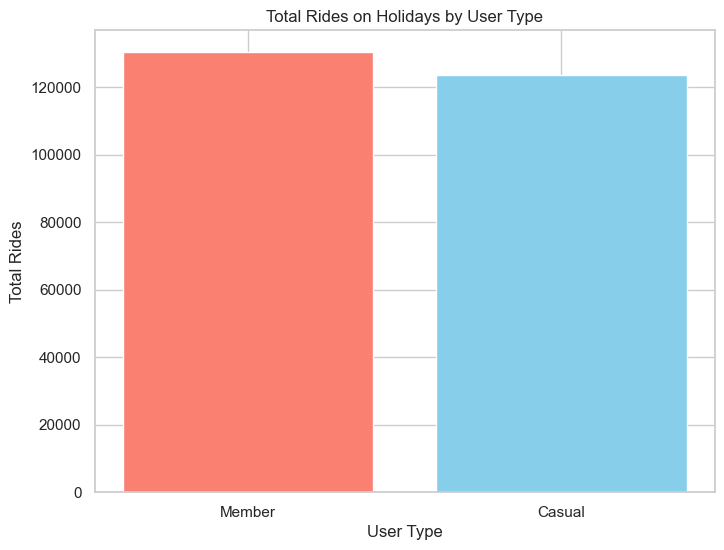

In [61]:
# I want to check During Holdays days who drives most and if there are more rides on Holiday days or in Normal days
# Assuming 'Holiday' column has "Yes" for holidays and "No" for non-holidays, 
# and 'Member' and 'Casual' columns contain the rides by user type.

# Filter the dataset for holiday data
holiday_data = capital_bike_hourly_weather[capital_bike_hourly_weather['Holiday'] == 'Yes']

# Calculate the total rides by each user type on holidays
holiday_rides_summary = holiday_data[['Member', 'Casual']].sum()

# Display the result
print("Total Rides on Holidays:")
print(holiday_rides_summary)

# Determine the user type with the highest rides on holidays
if holiday_rides_summary['Member'] > holiday_rides_summary['Casual']:
    print("Members have more rides than Casual riders during holidays.")
else:
    print("Casual riders have more rides than Members during holidays.")
    # Bar plot for visualization
plt.figure(figsize=(8, 6))
plt.bar(holiday_rides_summary.index, holiday_rides_summary.values, color=['salmon', 'skyblue'])
plt.title('Total Rides on Holidays by User Type')
plt.xlabel('User Type')
plt.ylabel('Total Rides')
plt.show()

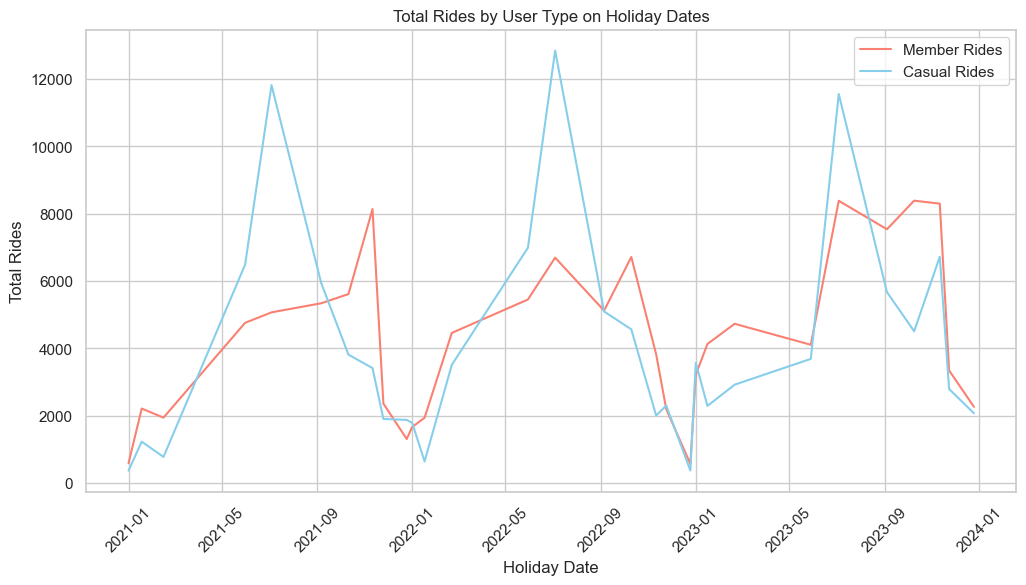

In [62]:
# Step 1: Filter the data for holidays only
holiday_data = capital_bike_hourly_weather[capital_bike_hourly_weather['Holiday'] == 'Yes']

# Step 2: Group by date and aggregate rides for each user type
# Summing the rides for each day on holidays
holiday_rides_by_date = holiday_data.groupby(['Date'])[['Member', 'Casual']].sum().reset_index()

# Step 3: Plot the line chart
plt.figure(figsize=(12, 6)) 
plt.plot(holiday_rides_by_date['Date'], holiday_rides_by_date['Member'], label='Member Rides', color='salmon')
plt.plot(holiday_rides_by_date['Date'], holiday_rides_by_date['Casual'], label='Casual Rides', color='skyblue')

# Adding labels and title
plt.xlabel('Holiday Date')
plt.ylabel('Total Rides')
plt.title('Total Rides by User Type on Holiday Dates')
plt.xticks(rotation=45)
plt.legend()

# Show grid for better readability
plt.grid(True)

plt.show()

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/3334549930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rides, x='Month', y='Total_rides', palette='viridis')


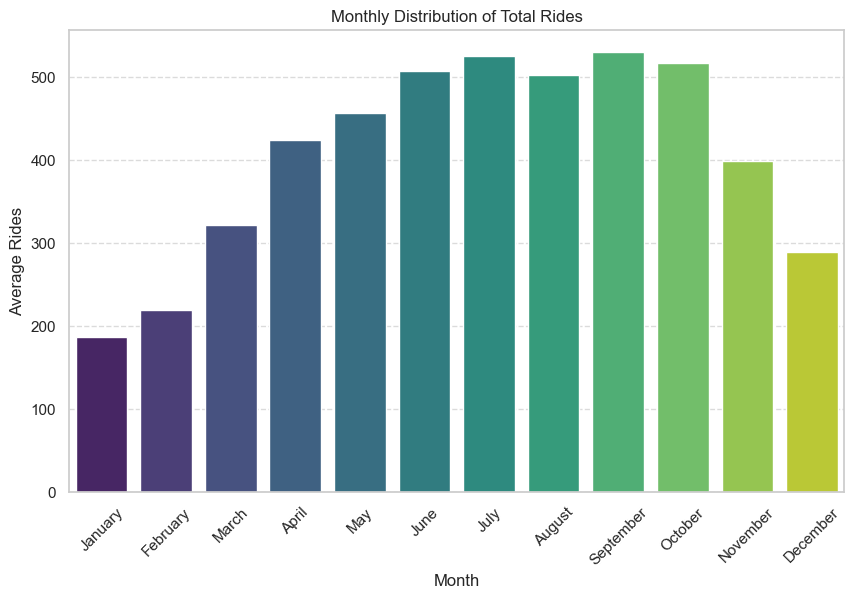

In [63]:
# Step 1: Create a 'Month' column
capital_bike_hourly_weather['Month'] = capital_bike_hourly_weather['Date'].dt.month

# Step 2: Group by 'Month' and calculate the total rides
monthly_rides = capital_bike_hourly_weather.groupby('Month')['Total_rides'].mean().reset_index()

# Step 3: Plot the monthly distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_rides, x='Month', y='Total_rides', palette='viridis')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Rides')
plt.title('Monthly Distribution of Total Rides')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_90510/3930429027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_rides, x='Weekend', y='Total_rides', palette='pastel')


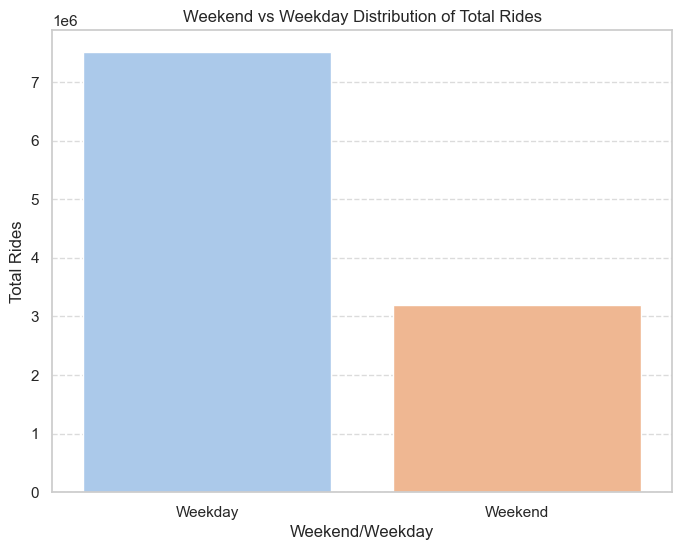

In [64]:
# Create a 'Weekend' column, where 1 means weekend and 0 means weekday
capital_bike_hourly_weather['Weekend'] = capital_bike_hourly_weather['Date'].dt.weekday >= 5  # True for Saturday/Sunday, False for Monday-Friday

# Group by 'Weekend' and calculate the total rides
weekend_rides = capital_bike_hourly_weather.groupby('Weekend')['Total_rides'].sum().reset_index()

# Map the 'Weekend' column to a more readable format
weekend_rides['Weekend'] = weekend_rides['Weekend'].map({True: 'Weekend', False: 'Weekday'})

# Plot the weekend vs weekday distribution of total rides
plt.figure(figsize=(8, 6))
sns.barplot(data=weekend_rides, x='Weekend', y='Total_rides', palette='pastel')

# Adding labels and title
plt.xlabel('Weekend/Weekday')
plt.ylabel('Total Rides')
plt.title('Weekend vs Weekday Distribution of Total Rides')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()